In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine=load_wine()
print(wine)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [3]:
#获得特征值
wine.data[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [4]:
#获得标签值
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
#获得特征名称
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
#获得标签名
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
#将标签和特征合在一起
import pandas as pd
dataFrame=pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print(dataFrame.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 0], dtype='int64')


In [8]:
#将数据分成训练集和测试集
train_x,test_x,train_y,test_y=train_test_split(wine.data,
                                               wine.target,
                                               test_size=0.3)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(wine.data.shape)

(124, 13)
(124,)
(54, 13)
(54,)
(178, 13)


In [9]:
#criterion表示的是不纯度的计算方式主要有两个：entropy和gini
#构建模型,random_state表示为：(决定特征的随机性)设置分支中随机模式参数，在高纬度是表示明显，在低纬度表示不明显，输入任意整数，会长出同一棵树
#splitter也表示为随机性，有两个参数：random，best。
# best优先选择更重要的特征进行分支，random(选择了没必要的特征)，可以防止过拟合
clf=tree.DecisionTreeClassifier(criterion="entropy"
                                ,random_state=30
                               ,splitter="random")
clf=clf.fit(train_x,train_y)
score=clf.score(test_x,test_y)#返回预测的准确度 accuracy

In [10]:
score

0.8703703703703703

In [16]:
import graphviz as gp
feature_name=["酒精","苹果酸","灰","灰的碱性",
              "镁","总酚","类黄酮","非黄烷类酚类",
              "花青素","颜色强度","色调","od280/od315稀释葡萄酒","脯氨酸"]
dot_data=tree.export_graphviz(clf
                              ,feature_names=feature_name
                              ,class_names=["琴酒","雪莉","贝尔摩得"]
                              ,filled=True
                              ,rounded=True
                              ,out_file = None
                             )

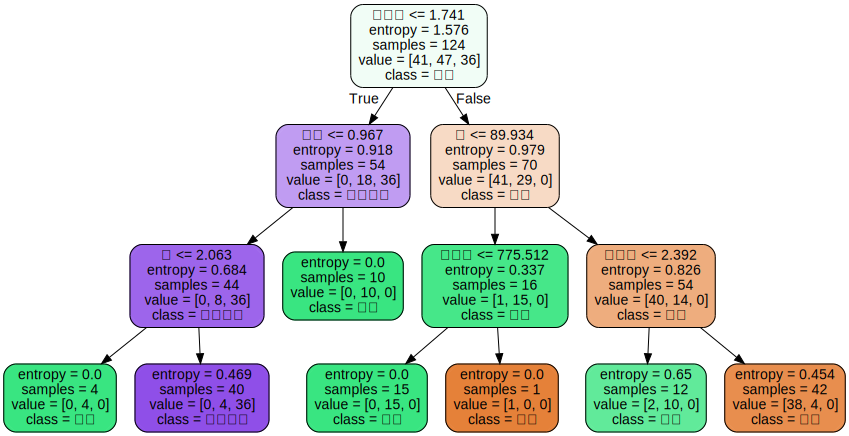

In [17]:
graph=gp.Source(dot_data)
graph

In [51]:
# 特征的重要性
clf.feature_importances_
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('苹果酸', 0.0),
 ('灰', 0.028069019334655713),
 ('灰的碱性', 0.0),
 ('镁', 0.06766905784901031),
 ('总酚', 0.0),
 ('类黄酮', 0.4302558713169931),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.018465737230276502),
 ('色调', 0.07741611778141183),
 ('od280/od315稀释葡萄酒', 0.16939115009387798),
 ('脯氨酸', 0.20873304639377463)]

In [52]:
clf.max_features_

13

In [19]:
score=clf.score(train_x,train_y)
score

0.9193548387096774

In [39]:
#为了能够让决策树更具泛化性，因此我们对决策树进行剪枝
#剪枝的参数：max_depth:树的最大的层数,
#min_samples_leaf表示叶子节点的样本数，比这个样本数少，则会被裁减
#min_samples_split表示能够分支的至少样本数，如果小于这个数，就不会有分支
#max_features限制分支时考虑的特征个数，超过这个限制个数的特征都会被舍弃
#min_impurity_decrease限制信息增益的大小，信息增益：父节点和子节点的之间的信息熵的差
#class_weight：当正反比例相差非常大的时候，使用class_weight来增加权重,
#进行剪枝用min_weight_fraction_leaf
clf=tree.DecisionTreeClassifier(criterion="entropy"
                               ,random_state=30
                               ,splitter="random"
                               ,max_depth=3
#                                ,min_samples_leaf=10
#                                ,min_samples_split=10
#                                 ,class_weight=""
#                                 ,min_weight_fraction_leaf=
                               )
clf=clf.fit(train_x,train_y)
score=clf.score(test_x,test_y)
score

0.9629629629629629

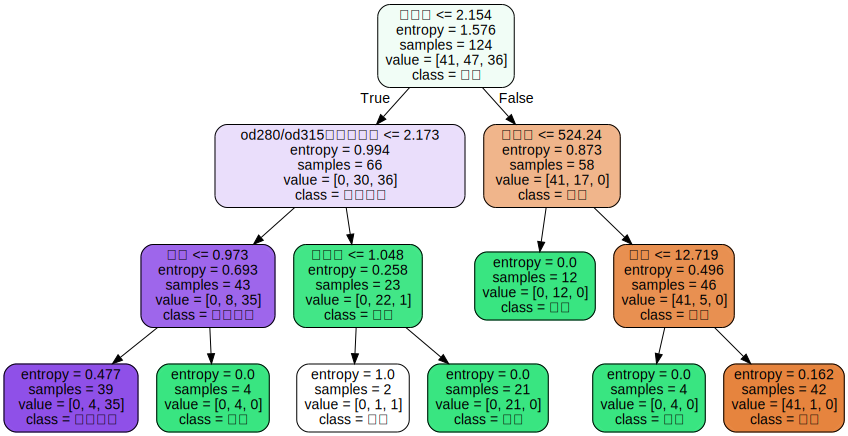

In [40]:
#filled表示的是颜色的填充
#rounded表示的是框变成方的
dot_data=tree.export_graphviz(clf
                              ,feature_names=feature_name
                              ,class_names=["琴酒","雪莉","贝尔摩得"]
                              ,filled=True
                              ,rounded=True
                              ,out_file = None
                            
                             )
graph=gp.Source(dot_data)
graph

In [41]:
score=clf.score(train_x,train_y)
score

0.9516129032258065

In [42]:
clf.score(test_x,test_y)

0.9629629629629629